<a href="https://colab.research.google.com/github/akshayrana1139/fun-with-ai/blob/master/Fashion%20MNIST%20using%20ML%20%26%20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST using Machine Learning algorithms 

In [1]:
import numpy
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000, -1)

In [3]:
import pandas as pd
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7898

## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", multi_class="auto")
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8412

# Fashion MNIST using Deep Learning

In [0]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Using a Feed Forward network

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.layers import Flatten, Dense, Activation 

model = Sequential()
model.add(Dense(units=100, input_shape=X_train.shape[1:],activation="relu",kernel_initializer="random_uniform",bias_initializer="zeros"))
model.add(Dense(units=50, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dense(units=25, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))
model.summary()

In [36]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train,
                    y_train, 
                    batch_size=128,
                    epochs = 10, 
                    validation_data = (X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.2835 - acc: 0.8972 - val_loss: 0.3853 - val_acc: 0.8673
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2781 - acc: 0.8970 - val_loss: 0.4094 - val_acc: 0.8581
Epoch 3/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2687 - acc: 0.9022 - val_loss: 0.3963 - val_acc: 0.8562
Epoch 4/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2639 - acc: 0.9031 - val_loss: 0.4012 - val_acc: 0.8600
Epoch 5/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.2556 - acc: 0.9052 - val_loss: 0.3943 - val_acc: 0.8632
Epoch 6/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2486 - acc: 0.9086 - val_loss: 0.4088 - val_acc: 0.8590
Epoch 7/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.2473 - acc: 0.9079 - val_loss: 0.

## Using a Convolution Neural Network


In [38]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation 

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape=X_train.shape[1:], activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
__________

## Start Training

In [39]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train,
                    y_train, 
                    batch_size=128,
                    epochs = 10, 
                    validation_data = (X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 1.6516 - acc: 0.7521 - val_loss: 0.4241 - val_acc: 0.8506
Epoch 2/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3622 - acc: 0.8674 - val_loss: 0.3837 - val_acc: 0.8612
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3178 - acc: 0.8832 - val_loss: 0.3543 - val_acc: 0.8727
Epoch 4/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.2845 - acc: 0.8935 - val_loss: 0.3324 - val_acc: 0.8822
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.2603 - acc: 0.9025 - val_loss: 0.3556 - val_acc: 0.8776
Epoch 6/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2435 - acc: 0.9068 - val_loss: 0.3387 - val_acc: 0.8815
Epoch 7/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2221 - acc: 0.9161 - val_loss: 0.3588 -

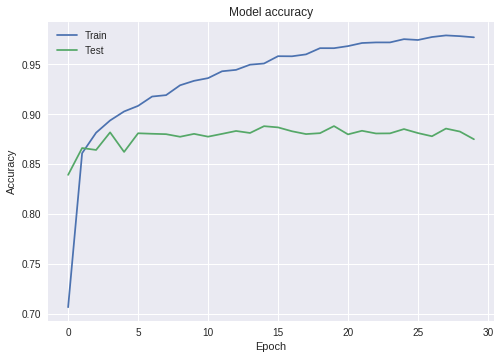

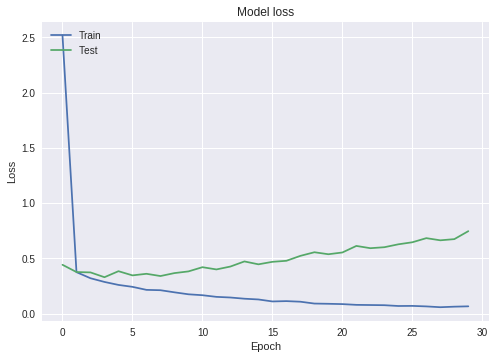

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Inference..  

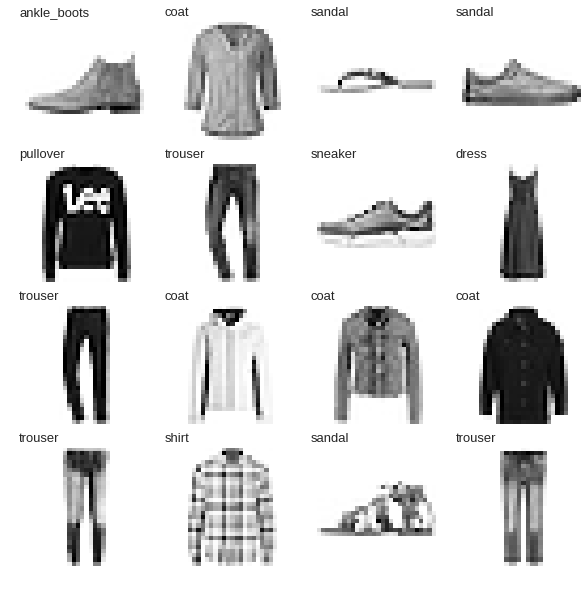

In [9]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

import numpy as np

from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(-2, -2, label, fontsize=13)
  pyplot.gcf().set_size_inches(10,10)  

plot_predictions(np.squeeze(X_test[:16]), 
                 model.predict(X_test[:16]))
